<a href="https://colab.research.google.com/github/e-evarela/DataJour/blob/main/TOVIMA_ENOIKIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
%matplotlib inline
import numpy as np
import glob
from sklearn.feature_extraction.text import CountVectorizer
from datetime import datetime

In [ ]:
filepath = "https://raw.githubusercontent.com/datajour-gr/DataJournalism/main/Bachelor%20Lessons%202023/Lesson%2010/NRC_GREEK_Translated_6_2020.csv"

In [ ]:
emolex_df = pd.read_csv(filepath)
emolex_df.head()

,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
0,αφεση,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ενορκη βεβαιωση,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,εχοντας,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,εχω,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,οριο,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
emolex_df.tail()

,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
13166,ουρλιασμα,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
13167,κροκος αυγου,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13168,νεοτερος,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13169,ζεφυρος,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13170,ζουμ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
emolex_df = emolex_df.drop_duplicates(subset=['word'])
emolex_df = emolex_df.dropna()
emolex_df.reset_index(inplace = True, drop=True)

In [ ]:
emolex_df.tail()

,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
13156,ουρλιασμα,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
13157,κροκος αυγου,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13158,νεοτερος,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13159,ζεφυρος,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13160,ζουμ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Εισαγωγή της βιβλιοθήκης spacy για να έχουμε δυνατότητες nlp**

In [ ]:
!python -m spacy download el_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 96.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('el_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import spacy

In [ ]:
nlp = spacy.load('el_core_news_sm')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
airbnb_df = pd.read_csv("/content/drive/MyDrive/DataJour/Articles_ToVima_Enoikia.csv")
# airbnb_df = pd.read_csv(data_csv_url)

In [ ]:
airbnb_df

,article_url,title,date,time,section,author,excert,text_body,feat_img_link,feat_img_caption
0,https://www.tovima.gr/2025/06/18/finance/ielka...,"ΙΕΛΚΑ: Οικονομικές διακοπές σε εξοχικά, ενοικι...",18-06-2025,15:03,Οικονομία,Newsroom,Ένας στους δύο Έλληνες δε θα πάει διακοπές φέτ...,Ένας στους δύο Έλληνες (52%) δεν προγραμματίζε...,https://www.tovima.gr/wp-content/uploads/2024/...,Ένας στους δύο Έλληνες δε θα πάει διακοπές φέτ...
1,https://www.tovima.gr/2025/06/11/finance/akini...,Ακίνητα: Γιατί ανεβαίνουν οι τιμές στα ενοίκια...,11-06-2025,07:19,Οικονομία,Γιάννης Αγουρίδης,"«Τρέχουν» τα ενοίκια, τι δείχνουν τα στοιχεία ...",Με φρενήρεις ρυθμούς συνεχίζουν να «τρέχουν» τ...,https://www.tovima.gr/wp-content/uploads/2025/...,"«Τρέχουν» τα ενοίκια, τι δείχνουν τα στοιχεία ..."
2,https://www.tovima.gr/2025/06/02/finance/enoik...,Ενοίκια: Ανοδική η πορεία τους – Ποιες περιοχέ...,02-06-2025,08:52,Οικονομία,Ανδρομάχη Παύλου,Διογκώνεται η στεγαστική κρίση στην Ελλάδα με ...,"Η στεγαστική κρίση διογκώνεται, με τις τιμές σ...",https://www.tovima.gr/wp-content/uploads/2024/...,Διογκώνεται η στεγαστική κρίση στην Ελλάδα με ...
3,https://www.tovima.gr/2025/05/30/culture/vivli...,"Βιβλιοπωλείο «Επί Λέξει»: Επιβίωσε στην κρίση,...",30-05-2025,10:56,Πολιτισμός,Ντιάνα Καρτσαγκούλη,"Το «Επί Λέξει», επί δώδεκα χρόνια σταθερός χώρ...",«Ο τοίχος που δεν μπορούμε να γκρεμίσουμε». Με...,https://www.tovima.gr/wp-content/uploads/2025/...,"Το «Επί Λέξει», επί δώδεκα χρόνια σταθερός χώρ..."
4,https://www.tovima.gr/2025/05/29/finance/stega...,"Στεγαστική κρίση: Ξένες επενδύσεις, Airbnb μεί...",29-05-2025,10:07,Οικονομία,Newsroom,Παρότι η επιβάρυνση από το κόστος στέγασης δεν...,Την τελευταία δεκαετία η στέγη έχει γίνει απλη...,https://www.tovima.gr/wp-content/uploads/2025/...,Παρότι η επιβάρυνση από το κόστος στέγασης δεν...
...,...,...,...,...,...,...,...,...,...,...
65,https://www.tovima.gr/2022/11/11/finance/epido...,Επίδομα θέρμανσης: Πότε θα καταβληθεί η πρώτη ...,11-11-2022,07:20,Οικονομία,Newsroom,Οι αιτήσεις θα υποβάλλονται μέχρι τις 9 Δεκεμβ...,Σε εξέλιξη βρίσκεται η διαδικασία υποβολής αιτ...,https://www.tovima.gr/wp-content/uploads/2022/...,Οι αιτήσεις θα υποβάλλονται μέχρι τις 9 Δεκεμβ...
66,https://www.tovima.gr/2022/10/30/society/kriti...,Κρήτη: Βράχος έπεσε σε ενοικιαζόμενα δωμάτια –...,30-10-2022,08:35,Κοινωνία,Newsroom,Ο 51χρονος πατέρας της οικογένειας απεγκλωβίστ...,Τραγωδία σημειώθηκε στην Κρήτη με μια γυναίκα ...,https://www.tovima.gr/wp-content/uploads/2022/...,Ο 51χρονος πατέρας της οικογένειας απεγκλωβίστ...
67,https://www.tovima.gr/2022/09/18/finance/foiti...,"Φοιτητική στέγη: Στα ύψη τα ενοίκια, λιγότερα...",18-09-2022,11:33,Οικονομία,Newsroom,Τι λένε για τις εξαγγελίες του Πρωθυπουργού,Για την κατακόρυφη αύξηση στις τιμές των ενοικ...,https://www.tovima.gr/wp-content/uploads/2022/...,Τι λένε για τις εξαγγελίες του Πρωθυπουργού
68,https://www.tovima.gr/2022/08/27/society/aleks...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
airbnb_df = airbnb_df.dropna(subset="date").reset_index(drop=True)
airbnb_df = airbnb_df.dropna(subset="text_body").reset_index(drop=True)
airbnb_df.shape

(65, 10)

In [ ]:
len(airbnb_df)

65

In [ ]:
short_airbnb_df = airbnb_df[['date', 'text_body']].rename(columns={'text_body': 'text'})

In [ ]:
short_airbnb_df.tail()

,date,text
60,18-11-2022,Συγκλονισμένη είναι τις τελευταίες ώρες η Ρούλ...
61,11-11-2022,Σε εξέλιξη βρίσκεται η διαδικασία υποβολής αιτ...
62,30-10-2022,Τραγωδία σημειώθηκε στην Κρήτη με μια γυναίκα ...
63,18-09-2022,Για την κατακόρυφη αύξηση στις τιμές των ενοικ...
64,09-08-2022,Η ενεργειακή κρίση στη Γερμανία επηρεάζει και ...


In [ ]:
emolex_df['word'].head(3)

,word
0,αφεση
1,ενορκη βεβαιωση
2,εχοντας


In [ ]:
vec = CountVectorizer(analyzer = 'word', vocabulary = emolex_df.word,
                      lowercase=False,
                      strip_accents = 'unicode',
                      stop_words= list(nlp.Defaults.stop_words),
                      ngram_range=(1, 2))

In [ ]:
matrix = vec.fit_transform(short_airbnb_df['text'])
vocab = vec.get_feature_names_out()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['αδιακοπα', 'ακομα', 'ακομη', 'ακριβως', 'αλλα', 'αλλαχου', 'αλλες', 'αλλη', 'αλλην', 'αλλης', 'αλλιως', 'αλλιωτικα', 'αλλο', 'αλλοι', 'αλλοιως', 'αλλοιωτικα', 'αλλον', 'αλλος', 'αλλοτε', 'αλλου', 'αλλους', 'αλλων', 'αμα', 'αμεσα', 'αμεσως', 'ανα', 'αναμεσα', 'αναμεταξυ', 'ανευ', 'αντι', 'αντιπερα', 'αντις', 'ανω', 'ανωτερω', 'αξαφνα', 'απεναντι', 'απο', 'αποψε', 'αρα', 'αραγε', 'αρκετα', 'αρκετες', 'αρχικα', 'αυριο', 'αυτα', 'αυτες', 'αυτη', 'αυτην', 'αυτης', 'αυτο', 'αυτοι', 'αυτον', 'αυτος', 'αυτου', 'αυτους', 'αυτων', 'αφοτου', 'αφου', 'βεβαια', 'βεβαιοτατα', 'γιατι', 'γρηγορα', 'γυρω', 'δεινα', 'δεξια', 'δηθεν', 'δηλαδη', 'διαρκως', 'δικα', 'δικο', 'δικοι', 'δικος', 'δικου', 'δικους', 'διολου', 'διπλα', 'διχως', 'εαν', 'εαυτο', 'εαυτον', 'εαυτου', 'εαυτους', 'εαυτων', 'εγιναν', 'εγινε',

,αφεση,ενορκη βεβαιωση,εχοντας,εχω,οριο,ορμος,υδρα,αγια τραπεζα,αμην,απατσι,...,κλητηριο ενταλμα,κατειργασμενος,μαγια,κιτρινο,κιτρινιζω,ουρλιασμα,κροκος αυγου,νεοτερος,ζεφυρος,ζουμ
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
wordcount_df.shape

(65, 13161)

In [ ]:
# Φτιάξε μια λίστα με positive words
positive_words = emolex_df[emolex_df.Positive == 1]['word']

# Φτιάξε μια λίστα με negative words
negative_words = emolex_df[emolex_df.Negative == 1]['word']

# Φτιάξε μια λίστα με anger words
angry_words = emolex_df[emolex_df.Anger == 1]['word']

# Φτιάξε μια λίστα με anticipation words
anticipation_words = emolex_df[emolex_df.Anticipation == 1]['word']

# Φτιάξε μια λίστα με disgust words
disgust_words = emolex_df[emolex_df.Disgust == 1]['word']

# Φτιάξε μια λίστα με fear words
fear_words = emolex_df[emolex_df.Fear == 1]['word']

# Φτιάξε μια λίστα με joy words
joy_words = emolex_df[emolex_df.Joy == 1]['word']

# Φτιάξε μια λίστα με sadness words
sadness_words = emolex_df[emolex_df.Sadness == 1]['word']

# Φτιάξε μια λίστα με surprise words
surprise_words = emolex_df[emolex_df.Surprise == 1]['word']

# Φτιάξε μια λίστα με trust words
trust_words = emolex_df[emolex_df.Trust == 1]['word']

In [ ]:
wordcount_df[trust_words].sum(axis=1).head(3)

,0
0,14
1,13
2,10


In [ ]:
short_airbnb_df.head(3)

,date,text
0,18-06-2025,Ένας στους δύο Έλληνες (52%) δεν προγραμματίζε...
1,11-06-2025,Με φρενήρεις ρυθμούς συνεχίζουν να «τρέχουν» τ...
2,02-06-2025,"Η στεγαστική κρίση διογκώνεται, με τις τιμές σ..."


In [ ]:
short_airbnb_df['anger'] = wordcount_df[angry_words].sum(axis=1)

short_airbnb_df['positive'] = wordcount_df[positive_words].sum(axis=1)

short_airbnb_df['joy'] = wordcount_df[joy_words].sum(axis=1)

short_airbnb_df['disgust'] = wordcount_df[disgust_words].sum(axis=1)

short_airbnb_df['surprise'] = wordcount_df[surprise_words].sum(axis=1)

short_airbnb_df['trust'] = wordcount_df[trust_words].sum(axis=1)

short_airbnb_df['anticipation'] = wordcount_df[anticipation_words].sum(axis=1)

short_airbnb_df['sadness'] = wordcount_df[sadness_words].sum(axis=1)

short_airbnb_df['negative'] = wordcount_df[negative_words].sum(axis=1)

short_airbnb_df['fear'] = wordcount_df[fear_words].sum(axis=1)

In [ ]:
short_airbnb_df

,date,text,anger,positive,joy,disgust,surprise,trust,anticipation,sadness,negative,fear
0,18-06-2025,Ένας στους δύο Έλληνες (52%) δεν προγραμματίζε...,8,43,18,4,5,14,27,6,16,12
1,11-06-2025,Με φρενήρεις ρυθμούς συνεχίζουν να «τρέχουν» τ...,3,15,2,5,2,13,8,5,17,11
2,02-06-2025,"Η στεγαστική κρίση διογκώνεται, με τις τιμές σ...",1,12,6,3,1,10,8,0,2,1
3,30-05-2025,«Ο τοίχος που δεν μπορούμε να γκρεμίσουμε». Με...,8,24,5,3,3,7,16,6,20,7
4,29-05-2025,Την τελευταία δεκαετία η στέγη έχει γίνει απλη...,3,13,4,2,3,5,5,4,8,6
...,...,...,...,...,...,...,...,...,...,...,...,...
60,18-11-2022,Συγκλονισμένη είναι τις τελευταίες ώρες η Ρούλ...,8,8,1,10,1,6,1,3,15,4
61,11-11-2022,Σε εξέλιξη βρίσκεται η διαδικασία υποβολής αιτ...,1,9,1,5,0,3,2,3,10,4
62,30-10-2022,Τραγωδία σημειώθηκε στην Κρήτη με μια γυναίκα ...,3,14,4,8,1,7,7,2,11,2
63,18-09-2022,Για την κατακόρυφη αύξηση στις τιμές των ενοικ...,1,2,2,2,0,5,2,2,4,1


In [ ]:
len(short_airbnb_df)

65

In [ ]:
short_airbnb_df = short_airbnb_df.set_index('date')  # Set 'date' as index
short_airbnb_df.index = pd.to_datetime(short_airbnb_df.index)  # Convert index to datetime

# Now resample
resampled = short_airbnb_df[['positive', 'negative', 'anger', 'joy', 'sadness']].resample('D').mean().fillna(0)

/tmp/ipython-input-27-4281083099.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  short_airbnb_df.index = pd.to_datetime(short_airbnb_df.index)  # Convert index to datetime


/tmp/ipython-input-28-3946525130.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  short_airbnb_df['text'].str.len().resample('3M').mean().plot()


<Axes: xlabel='date'>

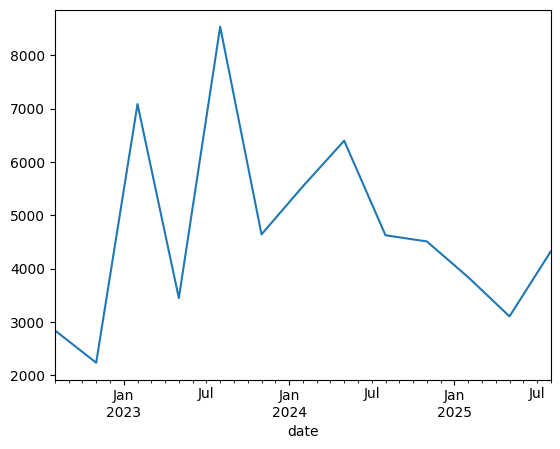

In [ ]:
short_airbnb_df['text'].str.len().resample('3M').mean().plot()

/tmp/ipython-input-29-1820397299.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  short_airbnb_df['text'].resample('6M').count().plot(kind='barh', color='blue')


<Axes: ylabel='date'>

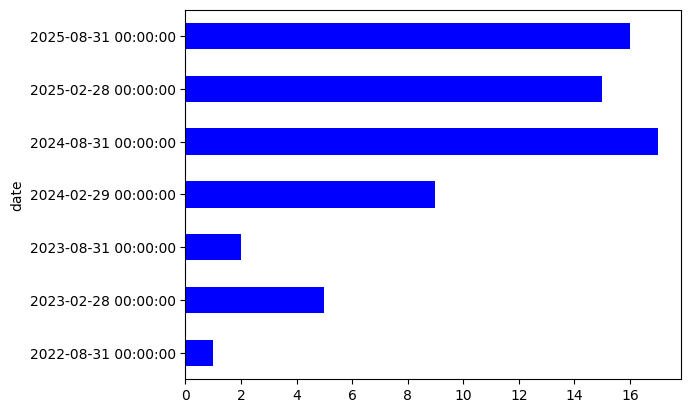

In [ ]:
short_airbnb_df['text'].resample('6M').count().plot(kind='barh', color='blue')

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('default')

In [ ]:
#plt.style.use('classic')
plt.style.use('ggplot')
#plt.style.use('Solarize_Light2')
#plt.style.use('seaborn-v0_8-bright')

/tmp/ipython-input-32-175908563.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ax = short_airbnb_df['positive'].resample('3M').mean().plot(figsize=(16,4),
/tmp/ipython-input-32-175908563.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  short_airbnb_df['negative'].resample('3M').mean().plot(figsize=(16,4), ax = ax,
/tmp/ipython-input-32-175908563.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  short_airbnb_df['trust'].resample('3M').mean().plot(figsize=(16,4), ax = ax,
/tmp/ipython-input-32-175908563.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  short_airbnb_df['disgust'].resample('3M').mean().plot(figsize=(16,4), ax = ax,
/tmp/ipython-input-32-175908563.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' inst

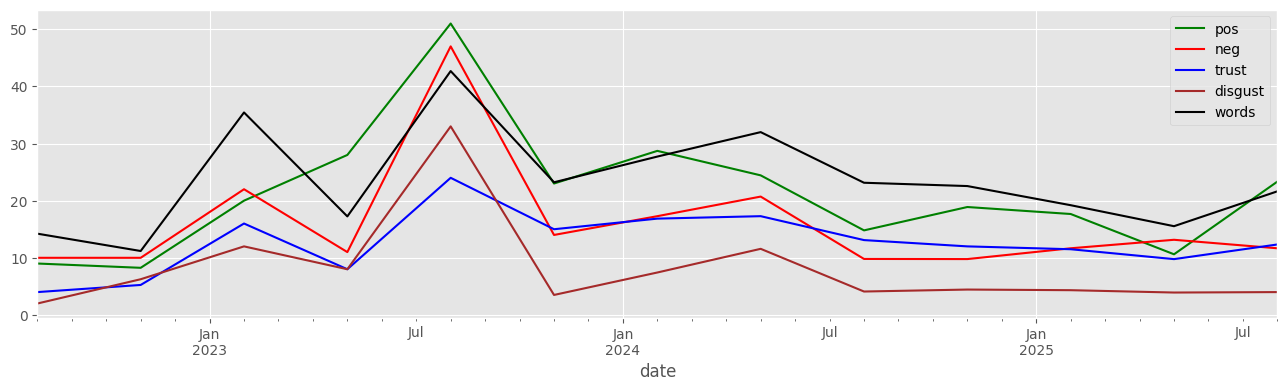

In [ ]:
ax = short_airbnb_df['positive'].resample('3M').mean().plot(figsize=(16,4),
                                                          color = 'g', label='pos')
short_airbnb_df['negative'].resample('3M').mean().plot(figsize=(16,4), ax = ax,
                                                   label = 'neg', color = 'r')
short_airbnb_df['trust'].resample('3M').mean().plot(figsize=(16,4), ax = ax,
                                                label = 'trust',color = 'blue').legend()
short_airbnb_df['disgust'].resample('3M').mean().plot(figsize=(16,4), ax = ax,
                                                label = 'disgust',color = 'brown').legend()
(short_airbnb_df['text'].str.len().resample('3M').mean()/200).plot(figsize=(16,4), ax = ax, # διαιρώ το mean των λέξεων με το 200 για να πλησιάσει στην κλίμακα τα άλλα
                                                label = 'words',color = 'black').legend()

In [ ]:
# daily_df = short_airbnb_df.resample('3M').mean().fillna(0)

/tmp/ipython-input-34-75750340.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  short_airbnb_df['pos/neg'].resample('3M').mean().plot(figsize=(16,4))


<Axes: xlabel='date'>

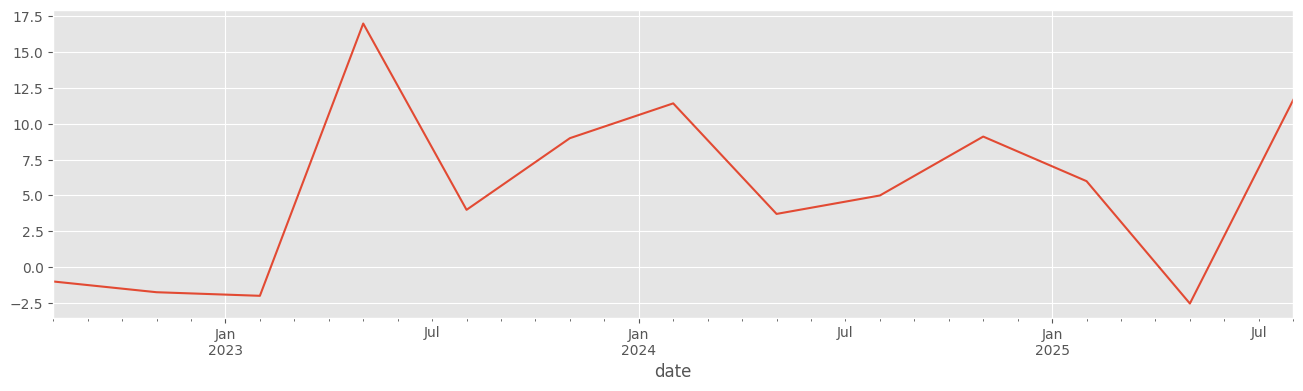

In [ ]:
short_airbnb_df['pos/neg'] = short_airbnb_df['positive'] - short_airbnb_df['negative']
short_airbnb_df['pos/neg'].resample('3M').mean().plot(figsize=(16,4))

In [ ]:
#plt.style.use('grayscale')
plt.style.use('seaborn-v0_8-darkgrid')

/tmp/ipython-input-36-2136036587.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  short_airbnb_df['(-)αρνητικότητα | θετικότητα(+)'].resample('3M').mean().plot(kind='bar',
/tmp/ipython-input-36-2136036587.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  color=(short_airbnb_df['(-)αρνητικότητα | θετικότητα(+)'].resample('3M').mean()>0


<Axes: xlabel='date'>

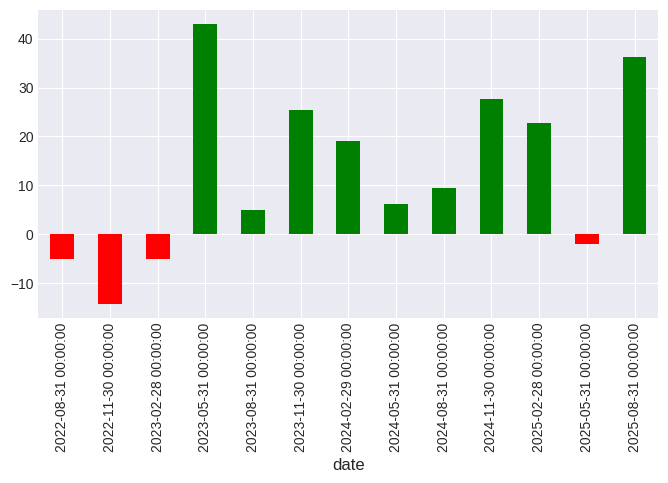

In [ ]:
short_airbnb_df['(-)αρνητικότητα | θετικότητα(+)'] = short_airbnb_df.positive*100//short_airbnb_df[['positive','negative']].sum(
        axis=1) - short_airbnb_df.negative*100//short_airbnb_df[['positive','negative']].sum(axis=1)

short_airbnb_df['(-)αρνητικότητα | θετικότητα(+)'].resample('3M').mean().plot(kind='bar',
                                                                               color=(short_airbnb_df['(-)αρνητικότητα | θετικότητα(+)'].resample('3M').mean()>0
                                                                               ).map({True: 'g', False: 'r'}), figsize=(8,4))

/tmp/ipython-input-37-2877103554.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  col: short_airbnb_df[col].resample('3M').mean()


<Axes: xlabel='date'>

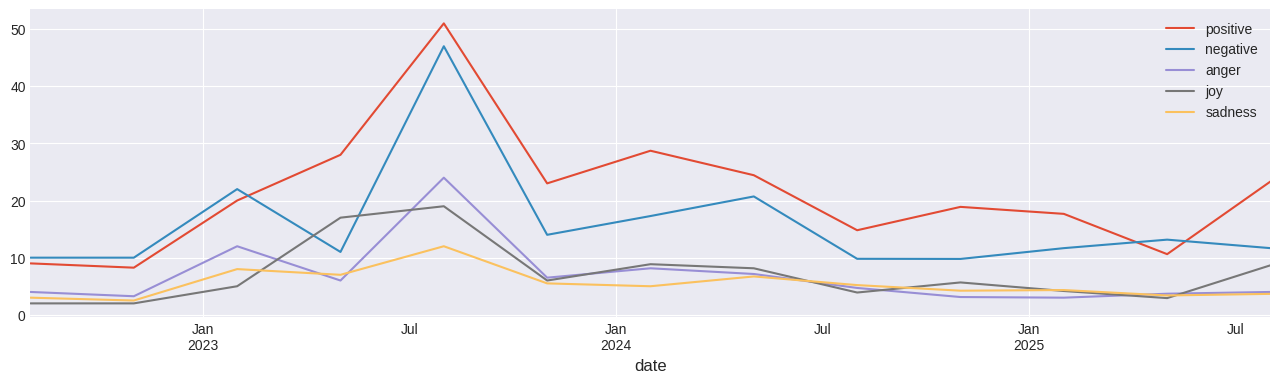

In [ ]:
# List of emotion columns
emotion_cols = ['positive', 'negative', 'anger', 'joy', 'sadness']  # add your columns here

# Resample each and combine
resampled = pd.DataFrame({
    col: short_airbnb_df[col].resample('3M').mean()
    for col in emotion_cols
})

# Plot all lines on one figure
resampled.plot(figsize=(16,4), kind='line')

In [ ]:
short_airbnb_df[
    (short_airbnb_df['(-)αρνητικότητα | θετικότητα(+)'] == short_airbnb_df['(-)αρνητικότητα | θετικότητα(+)'].max()) |
    (short_airbnb_df['(-)αρνητικότητα | θετικότητα(+)'] == short_airbnb_df['(-)αρνητικότητα | θετικότητα(+)'].min())
][['positive', 'negative', '(-)αρνητικότητα | θετικότητα(+)']]

,positive,negative,(-)αρνητικότητα | θετικότητα(+)
date,,,
2024-07-08,0,3,-100
2024-01-03,28,4,75


In [ ]:
text = airbnb_df['text_body'].str.cat(sep = ' ')

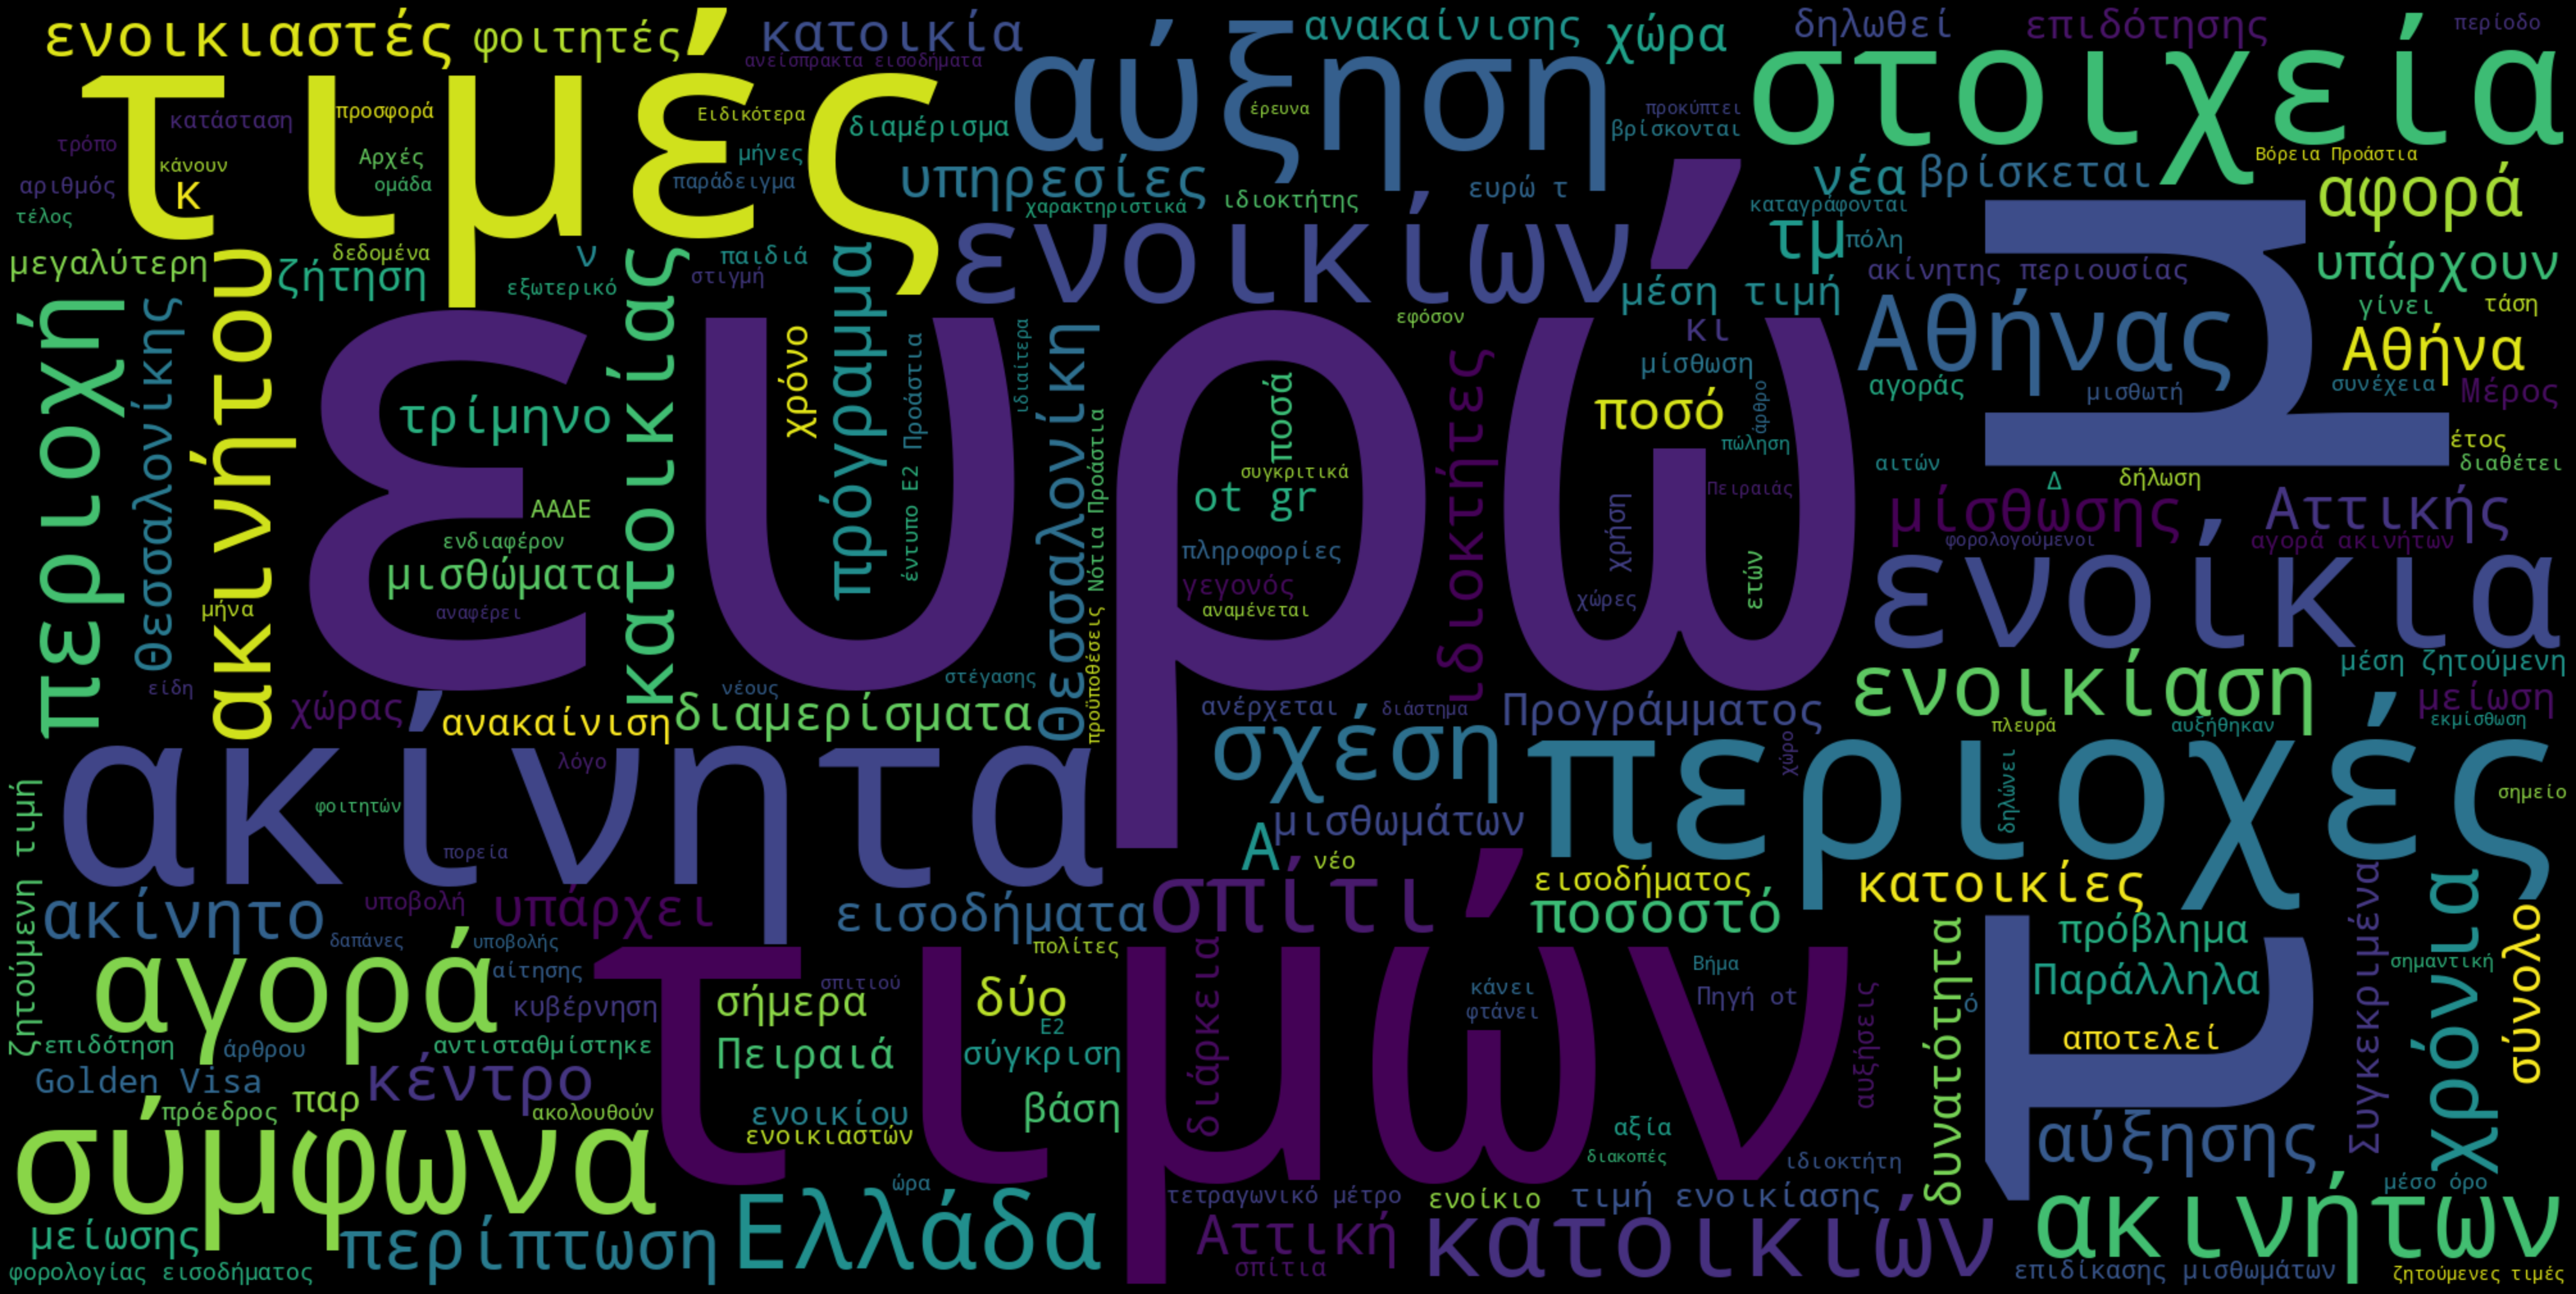

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud1 = WordCloud()
extra_stopwords = {'ή'}
all_stopwords = nlp.Defaults.stop_words.union(extra_stopwords)

wordcloud1 = WordCloud(
    stopwords=all_stopwords,
    width=2000,
    height=1000,
    background_color='black'
).generate(text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud1, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
mask = short_airbnb_df['text'].str.contains(r'Airbnb|airbnb|AIRBNB', na=False)
print(short_airbnb_df[mask])

                                                         text  anger  \
date                                                                   
2025-05-29  Την τελευταία δεκαετία η στέγη έχει γίνει απλη...      3   
2025-05-12  Νέες αποκαλύψεις βλέπουν το φως της δημοσιότητ...      5   
2025-05-11  Στην προφυλάκιση του 36χρονου που εμπλέκεται σ...      6   
2024-12-09  Από τα εκκαθαριστικά των φορολογικών δηλώσεων ...      1   
2024-07-29  Μετά το άγχος της αναμονής των βαθμολογιών και...     10   
2024-05-14  Δύο στους δέκα φορολογούμενους ή για την ακρίβ...      7   
2024-02-04  Χρυσή βίζα. Ευκαιρία 24ων καρατιών ή άνθρακας ...     21   

            positive  joy  disgust  surprise  trust  anticipation  sadness  \
date                                                                         
2025-05-29        13    4        2         3      5             5        4   
2025-05-12         9    2        6         5      6             8        4   
2025-05-11         7    4        6     

In [ ]:
filtered_df = short_airbnb_df[mask]
filtered_df

,text,anger,positive,joy,disgust,surprise,trust,anticipation,sadness,negative,fear,pos/neg,(-)αρνητικότητα | θετικότητα(+)
date,,,,,,,,,,,,,
2025-05-29,Την τελευταία δεκαετία η στέγη έχει γίνει απλη...,3,13,4,2,3,5,5,4,8,6,5,23
2025-05-12,Νέες αποκαλύψεις βλέπουν το φως της δημοσιότητ...,5,9,2,6,5,6,8,4,7,12,2,13
2025-05-11,Στην προφυλάκιση του 36χρονου που εμπλέκεται σ...,6,7,4,6,5,6,5,6,14,11,-7,-33
2024-12-09,Από τα εκκαθαριστικά των φορολογικών δηλώσεων ...,1,13,0,6,0,6,0,2,8,1,5,23
2024-07-29,Μετά το άγχος της αναμονής των βαθμολογιών και...,10,24,6,5,5,19,8,8,20,10,4,9
2024-05-14,Δύο στους δέκα φορολογούμενους ή για την ακρίβ...,7,25,12,15,6,16,8,7,21,8,4,9
2024-02-04,Χρυσή βίζα. Ευκαιρία 24ων καρατιών ή άνθρακας ...,21,74,17,20,13,39,25,15,39,22,35,31


In [ ]:
len(filtered_df)

7

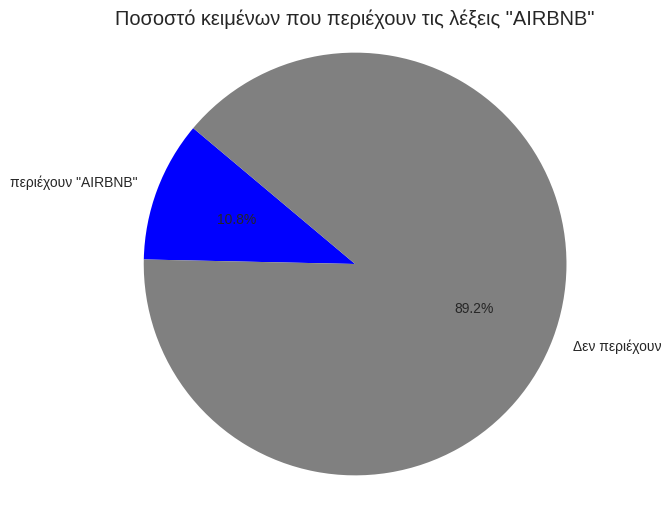

In [ ]:
import matplotlib.pyplot as plt

# Δημιουργία μάσκας
mask = short_airbnb_df['text'].str.contains(r'Airbnb|airbnb|AIRBNB', case=False, na=False)

# Υπολογισμός αριθμών
matching = mask.sum()                   # Πόσες γραμμές καλύπτει η μάσκα (True)
not_matching = len(mask) - matching     # Όσες δεν την καλύπτουν

# Δεδομένα για το pie chart
labels = ['περιέχουν "AIRBNB"', 'Δεν περιέχουν']
sizes = [matching, not_matching]
colors = ['blue', 'gray']

# Pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Ποσοστό κειμένων που περιέχουν τις λέξεις "AIRBNB"')
plt.axis('equal')  # κάνει τον κύκλο "στρογγυλό"
plt.show()